# Sci-Hub yearly stats

<pre>
This notebook contains Python code to plot two figures representing:

(a) total number of Sci-Hub PDF downloads worldwide each year
(b) total number of users as identified by unique IP addresses

The figures are prepared the paper 'From black open access to open access of colour: accepting the diversity of approaches towards free science'.
</pre>

In [1]:
import os
import json
import random
import pandas
import seaborn
import matplotlib.pyplot as pyplot
import matplotlib.style as style

from glob import glob
from tqdm.notebook import tqdm

## Loading input data

The input file contains number of downloads and users for every month since 2016, in the following format:

- **users** number of users as calculated by unique IP address
- **users:cuts** number of users identified as bots
- **downloads** number of PDF downloads
- **downloads:cut** number of PDF downloads from users identified as bots

In [2]:
months = json.loads(open('data/sci-hub monthly stats.json').read())
months

{'2016-01': {'users': 643172,
  'users:cut': 0,
  'downloads': 4923625,
  'downloads:cut': 0},
 '2016-02': {'users': 906221,
  'users:cut': 0,
  'downloads': 6213090,
  'downloads:cut': 0},
 '2016-03': {'users': 1102137,
  'users:cut': 0,
  'downloads': 7830354,
  'downloads:cut': 0},
 '2016-04': {'users': 974975,
  'users:cut': 0,
  'downloads': 6446384,
  'downloads:cut': 0},
 '2016-05': {'users': 845401,
  'users:cut': 0,
  'downloads': 6561495,
  'downloads:cut': 0},
 '2016-06': {'users': 934615,
  'users:cut': 0,
  'downloads': 6856367,
  'downloads:cut': 0},
 '2016-07': {'users': 989686,
  'users:cut': 0,
  'downloads': 7375115,
  'downloads:cut': 0},
 '2016-08': {'users': 604038,
  'users:cut': 0,
  'downloads': 3918473,
  'downloads:cut': 0},
 '2016-09': {'users': 1129058,
  'users:cut': 1,
  'downloads': 8091248,
  'downloads:cut': 105708},
 '2016-10': {'users': 1480891,
  'users:cut': 0,
  'downloads': 10270251,
  'downloads:cut': 0},
 '2016-11': {'users': 1716114,
  'users:c

## Preparing the data

The total number of users and downloads per year is calculated and robots are excluded:

In [3]:
totals = {'users' : {}, 'pdfs' : {}, 'users:full' : {}, 'pdfs:full' : {}}

for year in range(2016, 2024):
    for k in totals.keys():
        totals[k] [year] = 0
    for month in range(1,12 +1):
        if month < 10:
            month = '0' + str(month)
        ym = f'{year}-{month}'
        if ym in months and (ym not in ['2018-10', '2018-11']):
            totals['users'][year] += months[ym]['users'] - months[ym]['users:cut']
            totals['users:full'][year] += months[ym]['users']
            totals['pdfs'][year] += months[ym]['downloads'] - months[ym]['downloads:cut']
            totals['pdfs:full'][year] += months[ym]['downloads']

totals

{'users': {2016: 13041863,
  2017: 24925005,
  2018: 30494886,
  2019: 69864414,
  2020: 84030507,
  2021: 80137766,
  2022: 70748213,
  2023: 83644086},
 'pdfs': {2016: 94966027,
  2017: 214409066,
  2018: 294181548,
  2019: 864254203,
  2020: 852558482,
  2021: 719388310,
  2022: 922533096,
  2023: 1370678079},
 'users:full': {2016: 13041865,
  2017: 24925010,
  2018: 30494906,
  2019: 69864455,
  2020: 84030625,
  2021: 80137838,
  2022: 70748580,
  2023: 83644607},
 'pdfs:full': {2016: 95191554,
  2017: 216362084,
  2018: 306651939,
  2019: 897109821,
  2020: 876880793,
  2021: 737148010,
  2022: 1082122663,
  2023: 1683467380}}

The data is converted to Pandas Dataframe to create bar plots easily:

In [4]:
downloads = [{'year'      : year,
              'users'     : totals['users'][year],
              'users:full': totals['users:full'][year],
              'pdfs'      : totals['pdfs'][year],
              'pdfs:full' : totals['pdfs:full'][year]}
             
             for year in sorted(totals['users'].keys())]

data = pandas.DataFrame(downloads)
data.set_index('year', inplace = True)
data

,users,users:full,pdfs,pdfs:full
year,,,,
2016,13041863,13041865,94966027,95191554
2017,24925005,24925010,214409066,216362084
2018,30494886,30494906,294181548,306651939
2019,69864414,69864455,864254203,897109821
2020,84030507,84030625,852558482,876880793
2021,80137766,80137838,719388310,737148010
2022,70748213,70748580,922533096,1082122663
2023,83644086,83644607,1370678079,1683467380


Prepare the folder and name of the .png file to save plot as a picture:

In [5]:
save_to = 'figures/sci-hub downloads users year'

Prepare the annotated data for plotting:

In [6]:
subplots = [('pdfs', # 'pdfs' column of the Pandas dataframe used as data source
             
            ['number of PDF downloads',
             'number of downloads by bots'],
             'number of pdf downloads from Sci-Hub every year'),

            # 'users' column of the dataframe
            ('users',
            ['number of users accessing Sci-Hub'],
             'number of users accessing Sci-Hub every year\n(estimated by unique IP addresses)')
           ]


Plot and save the figures:

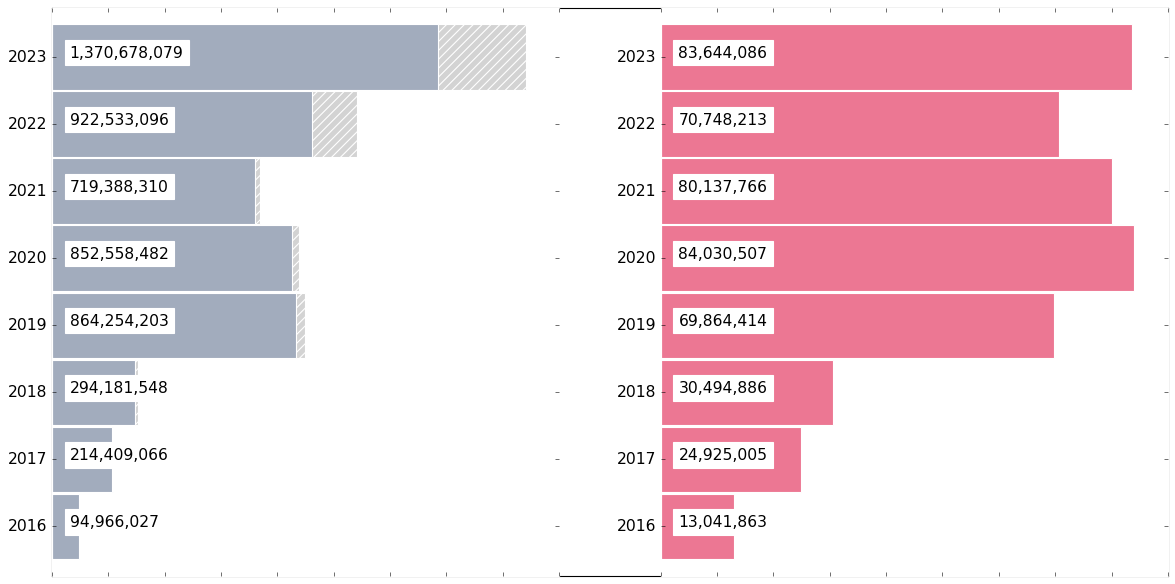

In [7]:
pyplot.style.use('classic')

fig = pyplot.figure(figsize = (18, 8.88), facecolor = 'white')

pyplot.xticks([])
pyplot.yticks([])

colors = ['#a2acbd', '#ec7793']
years = [str(y) for y in sorted(totals['pdfs'].keys())]

for i, (value, legend, title) in enumerate(subplots):
    ax = fig.add_subplot(121 + i)
    ax.ticklabel_format(style = 'plain')
    
    data[value].plot(ax = ax, kind = "barh", rot = 0, width = 0.98, color = colors[i], edgecolor = 'white', zorder = 2)

    for p in ax.patches:
        label = '{:,}'.format(p.get_width())
        ax.annotate(label, (0, p.get_y() + (p.get_height() * 0.5)),
                    backgroundcolor = '1',
                    textcoords = 'offset points',
                    fontsize = 14,
                    xytext = (16, 0)
                   )

    data[value + ':full'].plot(ax = ax, kind = "barh", rot = 0, width = 0.98, color = 'lightgray', hatch = '///', edgecolor = 'white', zorder = 1)
    
    ax.set(xticklabels = [], ylabel = None, xlabel = None)
    ax.set_yticklabels(years, fontsize = 14)
    
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted()).expanded(1.2, 1)

    pyplot.savefig(save_to + ' (' + chr(ord('a') + i) + ').png', bbox_inches = extent)
